In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2, style='whitegrid')
%matplotlib inline

In [2]:
df= pd.read_csv('diamonds.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# we drop these columns because their correlation is above .75. We keep the carat variable, from previous notebook
df = df.drop(columns=['x','y','z'])

# Testing Linear Regression Assumptions

## 1. Linearity between X and Y variable

### Linearity Carat vs. Price

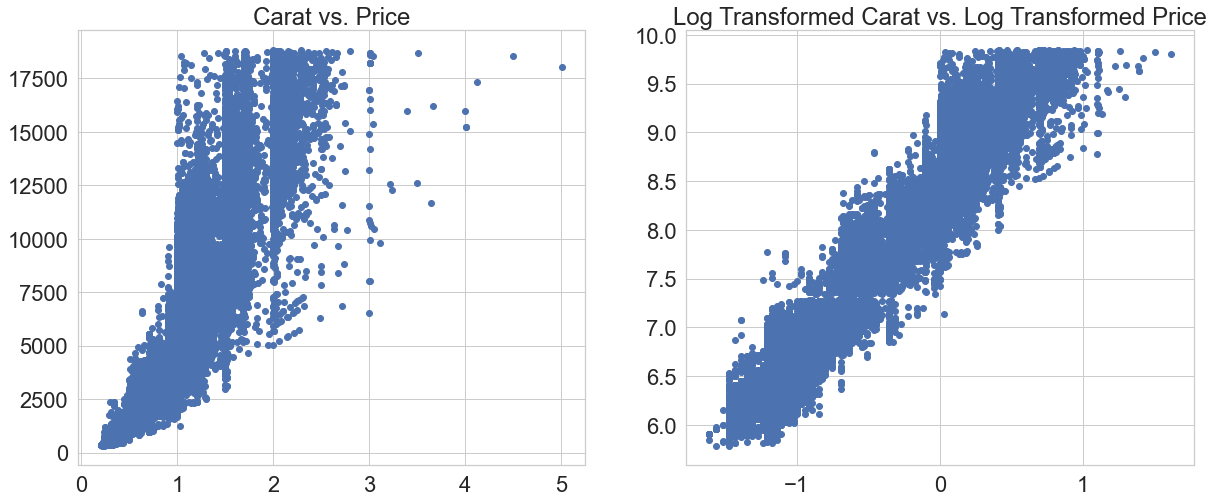

In [4]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Carat vs. Price')
plt.scatter(df.carat, df.price)

plt.subplot(1,2,2)
plt.title('Log Transformed Carat vs. Log Transformed Price')
plt.scatter(np.log(df.carat), np.log(df.price))

plt.show()

### Depth vs. Price

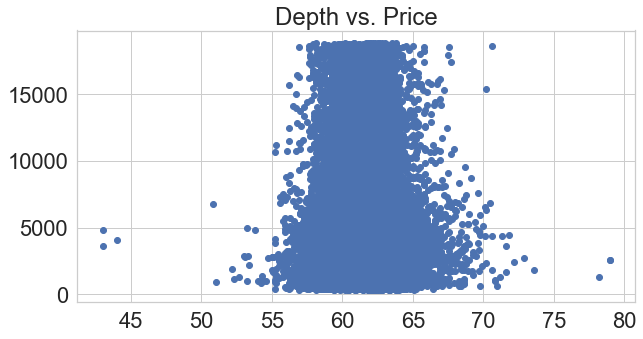

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Depth vs. Price')
plt.scatter(df.depth, df.price)

plt.show()

Inferences<br>
- there doesn't seem to be any relationship between depth and price because there is no correlation between. A change in depth doesn't signify a change in price.

### Table vs. Price

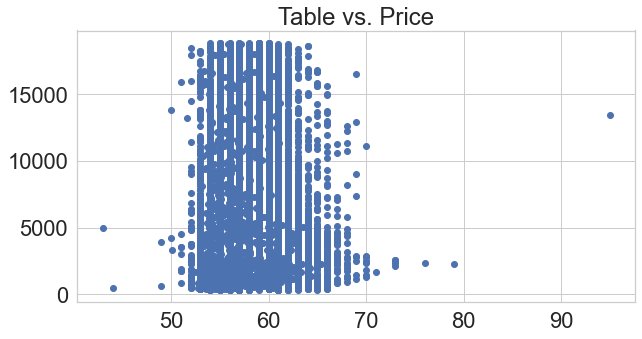

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Table vs. Price')
plt.scatter(df.table, df.price)

plt.show()

Inferences<br>
- there doesn't seem to be any relationship between table and price because there is no correlation between. A change in table doesn't signify a change in price.

## Non-Linear Log Transform Data

### Log Transform Carat

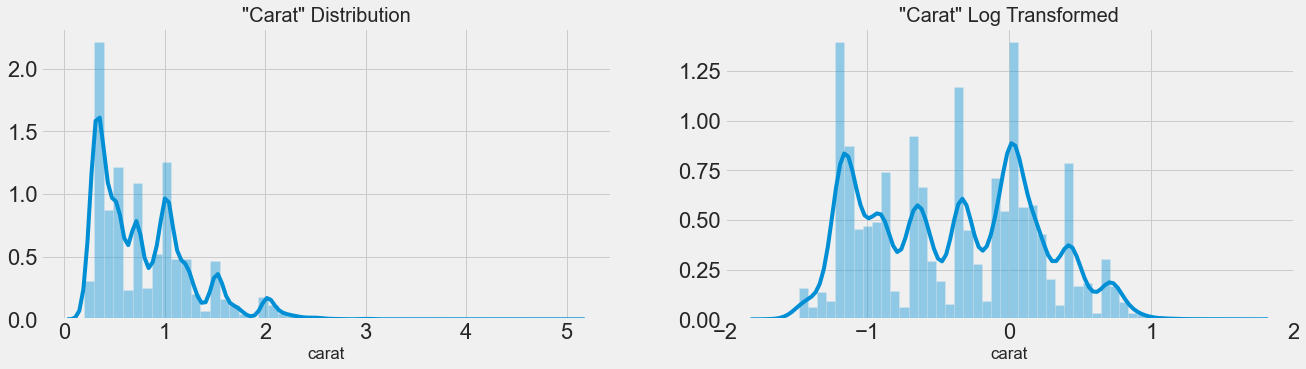

In [7]:
# np log carat because it seemed like an exponential distribution. Now it looks more normal.
import matplotlib.style as style # import to change style

style.use('fivethirtyeight')

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df.carat)
plt.title(fontsize=20, label='"Carat" Distribution')

plt.subplot(1,2,2)
sns.distplot(np.log(df.carat))
plt.title(fontsize=20, label='"Carat" Log Transformed');

#therefore we will keep log transform carat
df['carat'] = np.log(df.carat)

### Log Transform Price

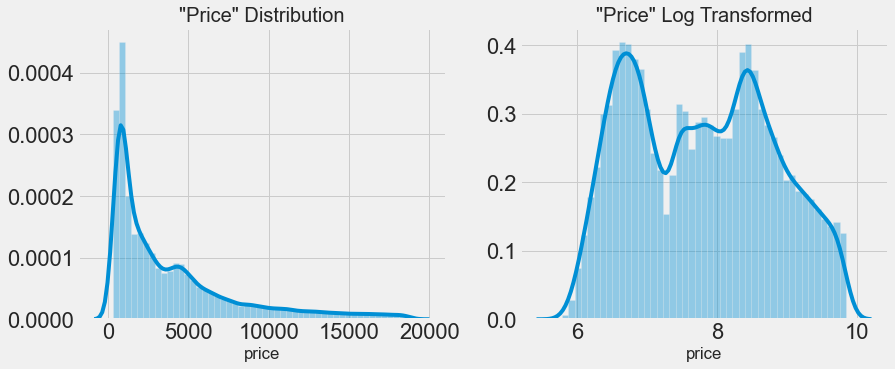

In [8]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.distplot(df.price)
plt.title(fontsize=20, label='"Price" Distribution');
plt.subplot(1,3,2)
sns.distplot(np.log(df.price))
plt.title(fontsize=20, label='"Price" Log Transformed')

style.use('fivethirtyeight');

#therefore we will log transform price
df['price'] = np.log(df.price)



### Table and Depth are already normally distributed

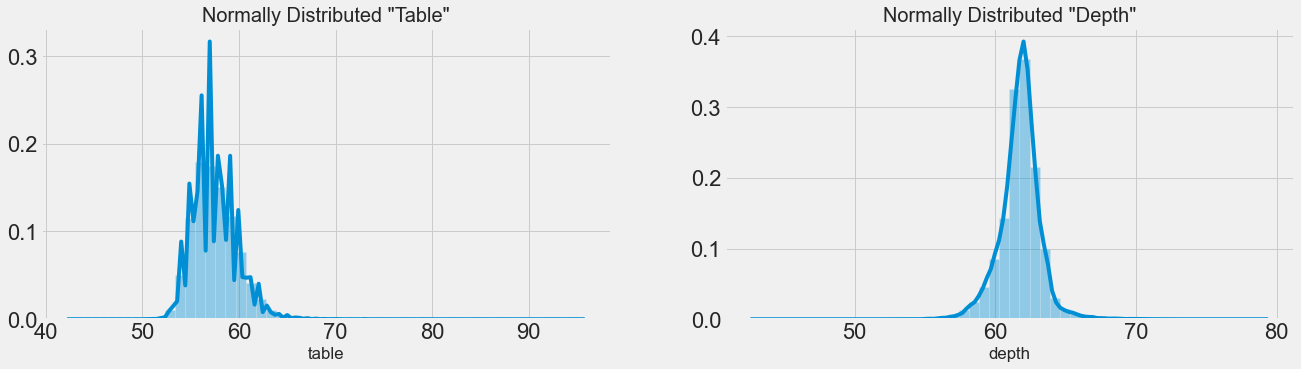

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df.table)
plt.title(fontsize=20, label='Normally Distributed "Table"')

plt.subplot(1,2,2)
sns.distplot(df.depth)
plt.title(fontsize=20, label='Normally Distributed "Depth"');

## 2. Testing Normality

Diamond Regression DataSet - Regression Analysis and Diagnostics for formula: Price~carat
-------------------------------------------------------------------------------------


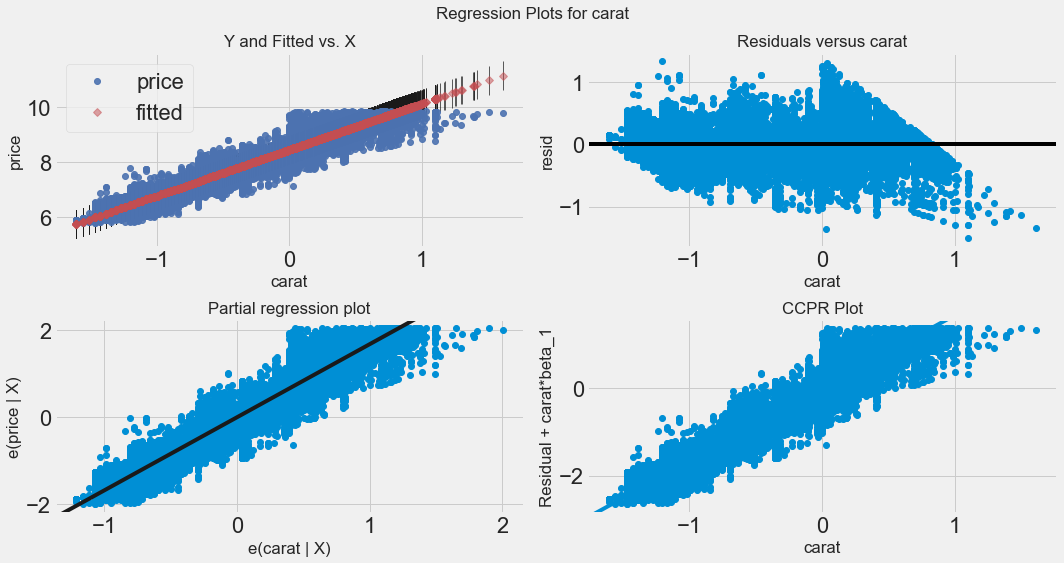

Press Enter to continue...
Diamond Regression DataSet - Regression Analysis and Diagnostics for formula: Price~depth
-------------------------------------------------------------------------------------


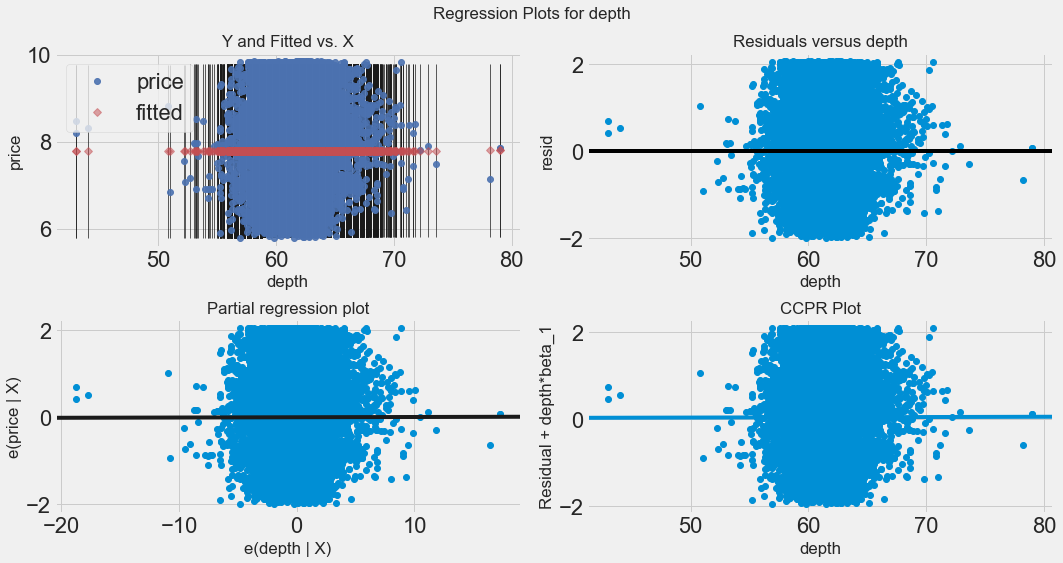

Press Enter to continue...
Diamond Regression DataSet - Regression Analysis and Diagnostics for formula: Price~table
-------------------------------------------------------------------------------------


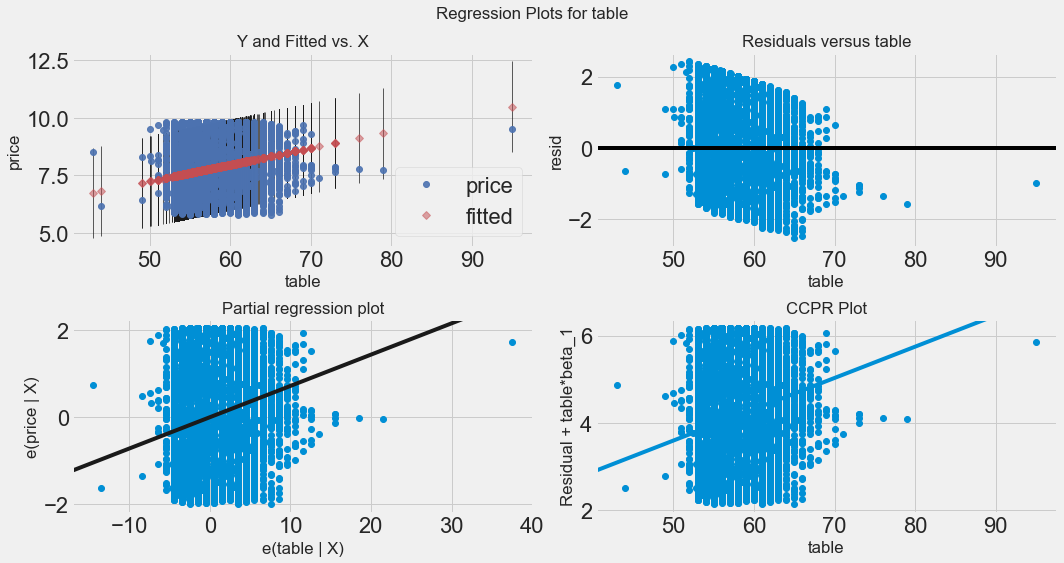

Press Enter to continue...


In [10]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms



results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['carat', 'depth', 'table']):
    print ("Diamond Regression DataSet - Regression Analysis and Diagnostics for formula: Price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
    
    model = smf.ols(formula=f, data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
#     df.plot(kind='scatter', x=val, y='price');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
#     fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

In [11]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,carat,0.932989,8.44866,1.67582,0,1679.88
2,depth,7.39789e-07,7.74915,0.00060917,0.841672,2822.48
3,table,0.0250297,3.65905,0.0718399,2.78414e-299,2436.76


## Creating Dummy Variables for Categorical Columns

In [12]:
#create dummy variables for categorical data
cut_dummies = pd.get_dummies(df.cut, prefix='cut', drop_first=True)
color_dummies = pd.get_dummies(df.color, prefix='col', drop_first=True)
clarity_dummies = pd.get_dummies(df.clarity, prefix='clar', drop_first=True)


#now we can drop the columns we originally had
df.drop(['cut','color','clarity'], axis = 1, inplace = True)

In [13]:
#concat dummy df to the main df 
df1 = pd.concat([df, cut_dummies, color_dummies, clarity_dummies], axis=1)

In [14]:
df1.columns

Index(['carat', 'depth', 'table', 'price', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'col_E', 'col_F', 'col_G', 'col_H',
       'col_I', 'col_J', 'clar_IF', 'clar_SI1', 'clar_SI2', 'clar_VS1',
       'clar_VS2', 'clar_VVS1', 'clar_VVS2'],
      dtype='object')

In [15]:
# rename column to remove space
df1.rename(columns={'cut_Very Good': 'cut_Very_Good'}, inplace=True)

## Running Model

### Training Model

In [18]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# set x and y variables
X = df1.drop(columns='price')
y = np.log(df1['price'])
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [19]:
predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors_int).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.022e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:54:02   Log-Likelihood:             1.0466e+05
No. Observations:               40455   AIC:                        -2.093e+05
Df Residuals:                   40434   BIC:                        -2.091e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0666      0.007    304.463      0.000       2.053       2.080
carat             0.2430      0.000   1358.475      0.000       0.243       0.243
depth            -0.0001   7.39e-05     -1.688      0.091      -0.000    2.01e-05
table          3.494e-05   5.45e-05      0.642      0.521   -7.18e-05       0.000
cut_Good          0.0078      0.001     12.615      0.000       0.007       0.009
cut_Ideal         0.0183      0.001     29.604      0.000       0.017       0.020
cut_Premium       0.0147      0.001     24.690      0.000       0.014       0.016
cut_Very_Good     0.0119      0.001     20.026      0.000       0.011       0.013
col_E            -0.0069      0.000    -20.708      0.000      -0.008      -0.006
col_F            -0.0125      0.000    -37.127      0.000      -0.013      -0.012
col_G            -0.0219      0.000    -66.442      0.000      -0.023      -0.021
col_H            -0.0346      0.000    -98.676      0.000      -0.035      -0.034
col_I            -0.0512      0.000   -130.300      0.000      -0.052      -0.050
col_J            -0.0683      0.000   -141.392      0.000      -0.069      -0.067
clar_IF           0.1405      0.001    147.756      0.000       0.139       0.142
clar_SI1          0.0726      0.001     89.800      0.000       0.071       0.074
clar_SI2          0.0518      0.001     63.689      0.000       0.050       0.053
clar_VS1          0.1001      0.001    121.220      0.000       0.099       0.102
clar_VS2          0.0913      0.001    112.283      0.000       0.090       0.093
clar_VVS1         0.1273      0.001    145.457      0.000       0.126       0.129
clar_VVS2         0.1170      0.001    137.356      0.000       0.115       0.119
==============================================================================
Omnibus:                     2621.386   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12659.109
Skew:                          -0.042   Prob(JB):                         0.00
Kurtosis:                       5.739   Cond. No.                     6.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Testing

In [20]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

#Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Comparing training vs test results

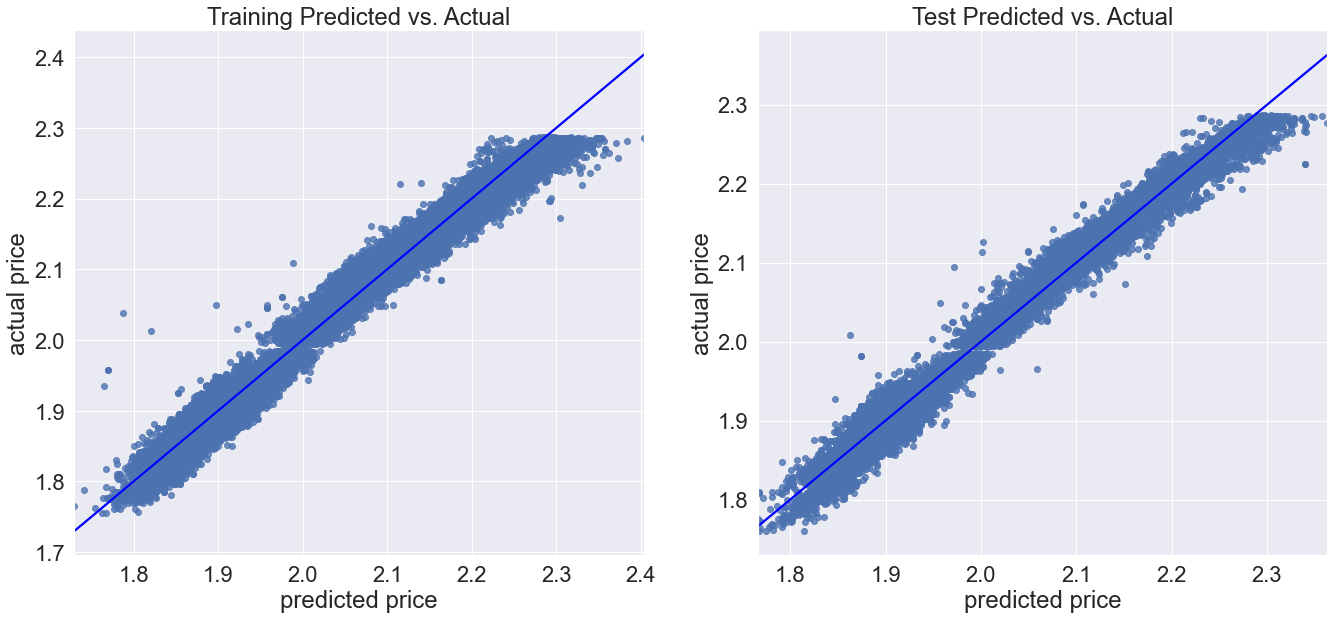

In [55]:
fig = plt.figure(figsize=(20,9))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.regplot(y_hat_train, y_train, line_kws={'color': 'blue'})
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('Training Predicted vs. Actual')

plt.subplot(1,2,2)
sns.regplot(y_hat_test, y_test, line_kws={'color': 'blue'})
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('Test Predicted vs. Actual')
style.use('ggplot');

In [56]:
from sklearn import metrics 

print('Train R2:', sklearn.metrics.r2_score(y_train, y_hat_train))
print('Test R2:', sklearn.metrics.r2_score(y_test, y_hat_test))
print('\n')
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

Train R2: 0.9806005580054734
Test R2: 0.9804433773941287


Train Root Mean Squared Error: 0.018207304797526316
Test Root Mean Squared Error: 0.01841116334943573


Our r2 value of .98 shows that our model features explain a lot of the predicted results. Our RMS

## Create Best Features Plot

In [23]:
feature_list = dict(zip(X_train.columns,linreg.coef_))
# sort by highest weights
feature_list_sorted = sorted(feature_list.items(),  key=lambda x: x[1], reverse=True)
# turn list into dictionary 
feature_list_sorted = dict(feature_list_sorted)

### Interpreting the coefficients


**Only Dependent is log-transformed** = (Exponentiate(coefficient) - 1) * 100 = X
<br>
**Interpretation**: "For every one-unit increase in the independent variable, our dependent variable increases by about (the number we get%)"
<br>
<br>
**Only Independent variable is log-transformed** = (Coefficient/100) = X
<br>
**Interpretation**: "For every 10% increase in the independent variable, the dependent variable increases by X."
<br>
**Both Independent & Dependent variable is log-transformed** = (Percentage Increase^coefficient - 1) * 100 = X percent
<br>
**Interpretation**: "For every % increas in the independent variable, our dependent variable increases by X percent."





Source: https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

In [24]:
# use dictionary to create a dataframe to plot on
features_df = pd.DataFrame(feature_list_sorted.items(), columns=['features','weight'])
features_df

,features,weight
0,carat,0.243018
1,clar_IF,0.140471
2,clar_VVS1,0.127313
3,clar_VVS2,0.117007
4,clar_VS1,0.100120
5,clar_VS2,0.091301
6,clar_SI1,0.072613
7,clar_SI2,0.051830
8,cut_Ideal,0.018297
9,cut_Premium,0.014730


In [25]:
# Include stronger coefficients and drop coefficeints with weights close to 0.
features_df_dropped = features_df.drop([8,9,10,11,12,13,14,15])

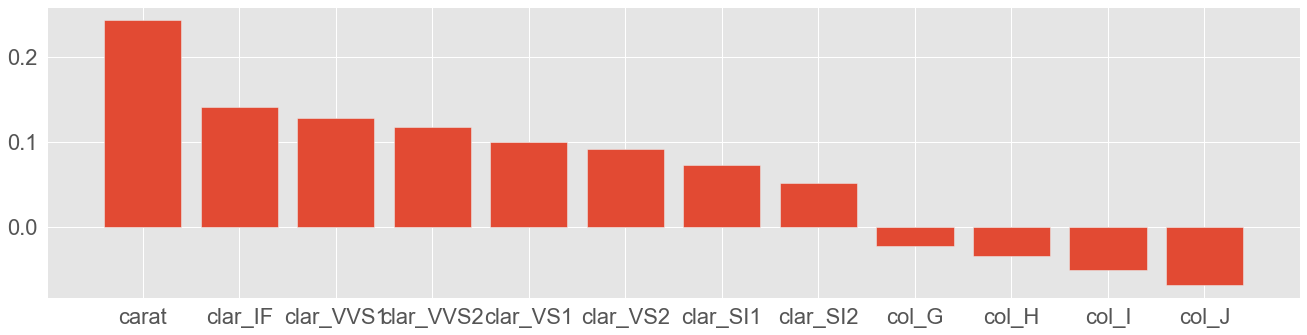

In [26]:
plt.figure(figsize=(20,5))
plt.bar(features_df_dropped['features'], features_df_dropped['weight']);

Our strongest coefficient is the 'carat' variable. The higher the carat is, the more the diamond costs. The IF clarity, which is the highest quality clarity, is ranked second followed by the other clarity levels. Our strongest negative coefficient are the 'color' features. The worse a color is, the more it negatively impacts the price. Towards the center where the coefficients are very close to 0, which has little effect on the model, are the "cuts" of the diamonds. Carat, Clarity and Color are the stronger ways to tell how the diamond is priced.